In [319]:
#Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
data = pd.read_csv('H:\Sacahcks\Medicare_Provider_Utilization_and_Payment_Data__2017_Part_D_Prescriber.csv')

In [320]:
sub_data = pd.read_csv('H:\Sacahcks\sub_data.csv')

In [321]:
data.shape

(25209130, 21)

In [322]:
opioid_data  = pd.read_excel('H:\Sacahcks\OpioidMedicationsIntheDataSet.xlsx')

In [323]:
#pay_zip['Recipient_Zip_Code'] = pay_zip['Recipient_Zip_Code'][0:5].astype(int)
#pay_zip['Total_Amount_of_Payment_USDollars'] = pay_zip['Total_Amount_of_Payment_USDollars'].astype(int)
#pay_zip.to_csv('pay_zip_state.csv')
#pay_zip.to_csv('pay_zip_conv.csv')

In [324]:
#take the part of the data from main data using given opioid medications
sub_data = data.loc[data['generic_name'].isin(list(opioid_data['Opioid Medications'][:]))]

In [325]:
#count of generic_name/drug_name 
y = sub_data['generic_name'].value_counts()

In [326]:
#printing the first five raws of data
sub_data.head(5)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
13,1477804466,ROBINSON,LAKEESHA,MILWAUKEE,WI,Nurse Practitioner,S,MORPHINE SULFATE ER,MORPHINE SULFATE,NaN,...,19.0,570,874.27,0.0,NaN,0.0,NaN,0.0,0.0,0.00
52,1740288091,GEHRING,DAVID,WOODBURY,NJ,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,NaN,...,30.0,745,555.88,NaN,*,NaN,*,NaN,NaN,NaN
70,1801810007,ADLER,BRIAN,SURFSIDE BEACH,SC,Internal Medicine,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,NaN,...,12.0,161,103.83,NaN,*,12.0,NaN,12.0,161.0,103.83
91,1437482346,GRAY,DONNA,SALISBURY,MD,Nurse Practitioner,S,TRAMADOL HCL,TRAMADOL HCL,NaN,...,23.0,675,156.69,NaN,#,NaN,#,NaN,NaN,NaN
100,1568402501,BUSCH,JULIE,SAINT LOUIS,MO,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,13.0,...,52.0,1174,1284.58,NaN,#,34.0,NaN,40.0,854.0,1089.58


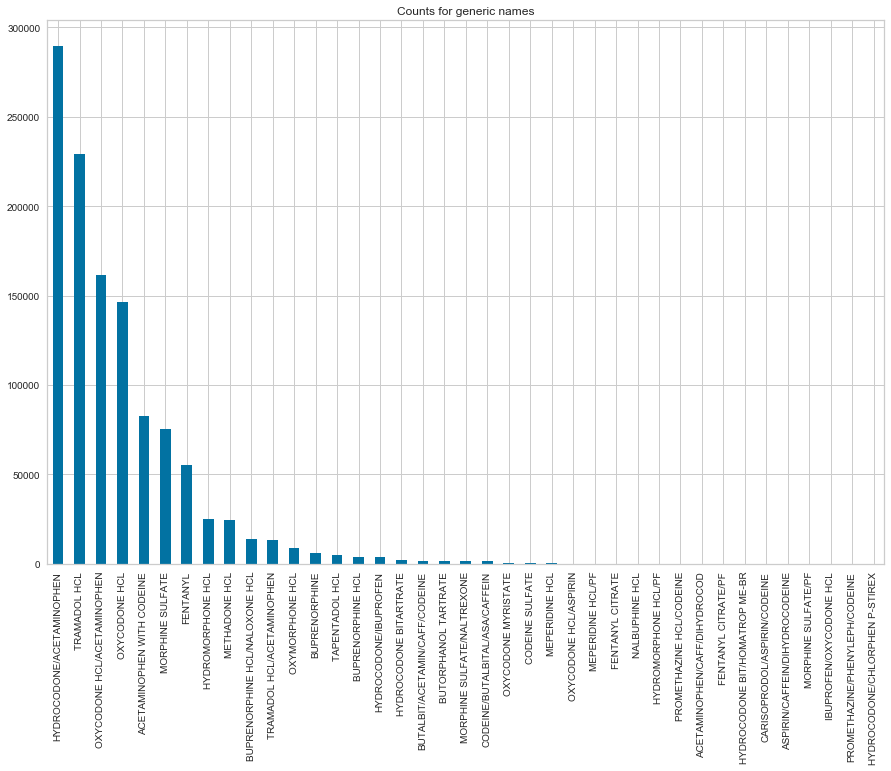

In [327]:
#plotting the graph for the count of generic_name
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
y.plot(kind="bar", ax=ax1, title="Counts for generic names")
plt.rc('xtick',labelsize=15)


In [328]:
#save the plot as a figure
fig.savefig('generic_names_count.png',dpi=450)

In [329]:
#count the number of NPI
y = sub_data['npi'].value_counts()
y

1134167455    31
1215924154    31
1497953749    31
1861572653    30
1952383887    30
1801819206    29
1144227596    29
1780672543    29
1366485229    29
1558460261    29
1447238415    29
1538117049    29
1114938586    28
1538130018    28
1356410443    28
1760418131    28
1811931546    28
1710085196    28
1669437869    28
1558353078    28
1689785073    28
1356427850    28
1689865891    28
1497778005    27
1588812762    27
1912993478    27
1841322104    27
1609912351    27
1043245749    27
1619978236    27
              ..
1952371999     1
1730116906     1
1750515615     1
1366722456     1
1851766067     1
1043734411     1
1033244553     1
1649665209     1
1861457079     1
1114136645     1
1720252661     1
1003975723     1
1750549549     1
1265594535     1
1700250685     1
1265582241     1
1255423042     1
1871620252     1
1508806811     1
1114993771     1
1104100197     1
1053689992     1
1689623670     1
1396032637     1
1548322936     1
1588735104     1
1184005258     1
1407830128    

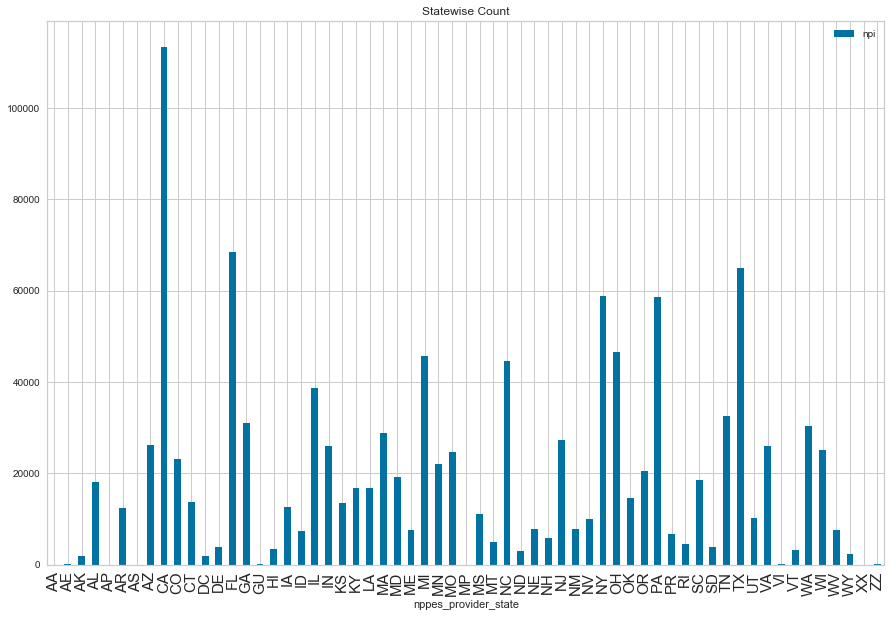

In [330]:
#plot the graph for statewise count of npi
count=sub_data.groupby(['nppes_provider_state']).agg({'npi':'count'})
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
count.plot(kind="bar", ax=ax1, title="Statewise Count")
plt.rc('xtick',labelsize=30)

In [331]:
#save the plot as a figure
fig.savefig('statwise_count.png',dpi=200)

In [249]:
#converting dataframe to csv for tableau
sub_data.to_csv('sub_data.csv')

In [250]:
#checking the response/json data using an API given by CMS using NPI number
response = req.get("https://npiregistry.cms.hhs.gov/api/?version=2.1&number=1245201227")

In [251]:
#priting the json data for clarification
response.json()

{'result_count': 1,
 'results': [{'enumeration_type': 'NPI-1',
   'number': 1245201227,
   'last_updated_epoch': 1479375798,
   'created_epoch': 1138579200,
   'basic': {'first_name': 'JOHN',
    'last_name': 'GRUENDEL',
    'middle_name': 'CHARLES',
    'credential': 'M.D.',
    'sole_proprietor': 'NO',
    'gender': 'M',
    'enumeration_date': '2006-01-30',
    'last_updated': '2016-11-17',
    'status': 'A',
    'name': 'GRUENDEL JOHN'},
   'other_names': [],
   'addresses': [{'country_code': 'US',
     'country_name': 'United States',
     'address_purpose': 'LOCATION',
     'address_type': 'DOM',
     'address_1': '672 STONELEIGH AVE',
     'address_2': '',
     'city': 'CARMEL',
     'state': 'NY',
     'postal_code': '105124634',
     'telephone_number': '945-279-2000',
     'fax_number': '845-279-7730'},
    {'country_code': 'US',
     'country_name': 'United States',
     'address_purpose': 'MAILING',
     'address_type': 'DOM',
     'address_1': '110 S BEDFORD RD',
     'add

In [332]:
data.shape

(25209130, 21)

In [253]:
data.isna().sum()

npi                                     0
nppes_provider_last_org_name          471
nppes_provider_first_name             351
nppes_provider_city                     0
nppes_provider_state                    0
specialty_description                   0
description_flag                        0
drug_name                               0
generic_name                            0
bene_count                       15117605
total_claim_count                       0
total_30_day_fill_count                 0
total_day_supply                        0
total_drug_cost                         0
bene_count_ge65                  21722787
bene_count_ge65_suppress_flag     3486343
total_claim_count_ge65           10891465
ge65_suppress_flag               14317665
total_30_day_fill_count_ge65     10891465
total_day_supply_ge65            10891465
total_drug_cost_ge65             10891465
dtype: int64

In [254]:
#getting the postal code (first five digits) from json for the data visualisation on map
p_code = response.json()['results'][0]['addresses'][0]['postal_code'][0:5]

In [333]:
#removing the following areas from the data which are not the part of USA states 
sub_data = sub_data[sub_data.nppes_provider_state != 'XX']
sub_data = sub_data[sub_data.nppes_provider_state != 'AA']
sub_data = sub_data[sub_data.nppes_provider_state != 'AE']
sub_data = sub_data[sub_data.nppes_provider_state != 'AP']
sub_data = sub_data[sub_data.nppes_provider_state != 'AS']
sub_data = sub_data[sub_data.nppes_provider_state != 'GU']
sub_data = sub_data[sub_data.nppes_provider_state != 'MP']
sub_data = sub_data[sub_data.nppes_provider_state != 'PR']
sub_data = sub_data[sub_data.nppes_provider_state != 'VI']
sub_data = sub_data[sub_data.nppes_provider_state != 'ZZ']


In [334]:
#get the dimensions of the data
sub_data.shape

(1148099, 21)

In [335]:
#checking the null values in dataset
sub_data.isna().sum()

npi                                   0
nppes_provider_last_org_name         29
nppes_provider_first_name            12
nppes_provider_city                   0
nppes_provider_state                  0
specialty_description                 0
description_flag                      0
drug_name                             0
generic_name                          0
bene_count                       515008
total_claim_count                     0
total_30_day_fill_count               0
total_day_supply                      0
total_drug_cost                       0
bene_count_ge65                  928067
bene_count_ge65_suppress_flag    220032
total_claim_count_ge65           555124
ge65_suppress_flag               592975
total_30_day_fill_count_ge65     555124
total_day_supply_ge65            555124
total_drug_cost_ge65             555124
dtype: int64

In [336]:
#copy the data in new variable for backup
sub_data_copy = sub_data.copy()
#sub_data.groupby('npi').size()

In [337]:
#take the mean of total_day_supply to decide the factor
sub_data_copy['total_day_supply'].mean()

1381.814719810748

In [338]:
#adding one column using total_day_supply if total_day_supply > 1000 then 1 else 0
sub_data_copy['Opoid_prescriber'] = sub_data_copy['total_day_supply'].apply(lambda x: 1 if x>1000 else 0)

In [339]:
#count the number of Opoid_prescriber
sub_data_copy['Opoid_prescriber'].value_counts()

0    808052
1    340047
Name: Opoid_prescriber, dtype: int64

In [340]:
#Check the data 
sub_data_copy.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,Opoid_prescriber
13,1477804466,ROBINSON,LAKEESHA,MILWAUKEE,WI,Nurse Practitioner,S,MORPHINE SULFATE ER,MORPHINE SULFATE,NaN,...,570,874.27,0.0,NaN,0.0,NaN,0.0,0.0,0.00,0
52,1740288091,GEHRING,DAVID,WOODBURY,NJ,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,NaN,...,745,555.88,NaN,*,NaN,*,NaN,NaN,NaN,0
70,1801810007,ADLER,BRIAN,SURFSIDE BEACH,SC,Internal Medicine,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,NaN,...,161,103.83,NaN,*,12.0,NaN,12.0,161.0,103.83,0
91,1437482346,GRAY,DONNA,SALISBURY,MD,Nurse Practitioner,S,TRAMADOL HCL,TRAMADOL HCL,NaN,...,675,156.69,NaN,#,NaN,#,NaN,NaN,NaN,0
100,1568402501,BUSCH,JULIE,SAINT LOUIS,MO,Family Practice,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,13.0,...,1174,1284.58,NaN,#,34.0,NaN,40.0,854.0,1089.58,1


In [341]:
#divide the variables into categorical, dependanat, discrete adn continous variable
categorical_vars = ['nppes_provider_state','specialty_description','nppes_provider_city']
dep_var = ['Opoid_prescriber']
discrete_vars = ['total_day_supply']
continuous_vars = ['bene_count','total_day_supply_ge65','total_drug_cost','bene_count_ge65','total_30_day_fill_count_ge65','total_drug_cost_ge65']

In [342]:
#drop teh unnecessary columns that are not required to predict the test 

#sub_data_copy = sub_data_copy.drop('nppes_provider_state', axis='columns')
#sub_data_copy = sub_data_copy.drop('specialty_description', axis='columns')
#sub_data_copy = sub_data_copy.drop('nppes_provider_city', axis='columns')
sub_data_copy = sub_data_copy.drop('generic_name', axis='columns')
sub_data_copy = sub_data_copy.drop('nppes_provider_last_org_name', axis='columns')
sub_data_copy = sub_data_copy.drop('nppes_provider_first_name', axis='columns')
sub_data_copy = sub_data_copy.drop('description_flag', axis='columns')
sub_data_copy = sub_data_copy.drop('drug_name', axis='columns')
sub_data_copy = sub_data_copy.drop('bene_count_ge65_suppress_flag', axis='columns')
sub_data_copy = sub_data_copy.drop('ge65_suppress_flag', axis='columns')
sub_data_copy = sub_data_copy.drop('total_day_supply', axis='columns')
sub_data_copy = sub_data_copy.drop('total_claim_count_ge65', axis='columns')
#sub_data_copy = sub_data_copy.drop('Opoid_prescriber', axis='columns')

In [343]:
#print the data
sub_data_copy.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,bene_count,total_claim_count,total_30_day_fill_count,total_drug_cost,bene_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,Opoid_prescriber
13,1477804466,MILWAUKEE,WI,Nurse Practitioner,NaN,19,19.0,874.27,0.0,0.0,0.0,0.00,0
52,1740288091,WOODBURY,NJ,Family Practice,NaN,30,30.0,555.88,NaN,NaN,NaN,NaN,0
70,1801810007,SURFSIDE BEACH,SC,Internal Medicine,NaN,12,12.0,103.83,NaN,12.0,161.0,103.83,0
91,1437482346,SALISBURY,MD,Nurse Practitioner,NaN,23,23.0,156.69,NaN,NaN,NaN,NaN,0
100,1568402501,SAINT LOUIS,MO,Family Practice,13.0,46,52.0,1284.58,NaN,40.0,854.0,1089.58,1


In [344]:
#replace null values with mean
for i in continuous_vars:
    sub_data_copy[i] = sub_data_copy[i].isna().mean()

In [359]:
#split data into train and test
train,test = train_test_split(sub_data_copy,test_size=0.35,random_state=40)
print(train.shape)
print(test.shape)

(746264, 13)
(401835, 13)


In [360]:
#factorize categorical data
for col in categorical_vars:
    train[col]=pd.factorize(train[col], sort=True)[0]
    test[col] =pd.factorize(test[col],sort=True)[0]

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [357]:
#take features from train
features=train.iloc[:,1:12] #make sure we only use the columns that we want as our features
features.head()
features.shape

(746264, 11)

In [358]:
features.head()

,nppes_provider_state,specialty_description,bene_count,total_claim_count,total_30_day_fill_count,total_drug_cost,bene_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,Opoid_prescriber
22235484,10,50,0.448575,33,33.5,0.0,0.808351,0.483516,0.483516,0.483516,0
22883215,48,69,0.448575,118,118.0,0.0,0.808351,0.483516,0.483516,0.483516,1
19639695,43,33,0.448575,616,616.0,0.0,0.808351,0.483516,0.483516,0.483516,1
3066498,37,9,0.448575,56,56.0,0.0,0.808351,0.483516,0.483516,0.483516,1
14628755,47,69,0.448575,94,94.0,0.0,0.808351,0.483516,0.483516,0.483516,1


In [354]:
#train and test data
train=train.iloc[:,1:]
test=test.iloc[:,1:]
train.shape
test.shape

(401835, 12)

In [361]:
#model for predict 
target = train['Opoid_prescriber']
Name = []
Accuracy = []
model1=LogisticRegression(random_state=20,C=0.00000001,solver='liblinear',max_iter=200)
model2=KNeighborsClassifier()
for model, label in zip([model1, model2], ['Logistic Regression','KNN']):
    scores = cross_val_score(model, features, target, cv=5, scoring='accuracy')
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))


Accuracy: 0.864120 of model Logistic Regression
Accuracy: 0.976033 of model KNN


In [281]:
import seaborn as sns

In [ ]:
sns.pairplot(sub_data_copy, kind = 'reg')
plt.show()